In [ ]:
import os

print("Files in /content:")
print("\n".join(sorted(os.listdir("/content"))))

Files in /content:
.config
.ipynb_checkpoints
REP_S_00134_SMRY.csv
rep_s_00014_SMRY.csv
rep_s_00191_SMRY-3.csv
rep_s_00673_SMRY.csv
sample_data


In [ ]:
import pandas as pd

# 3 clean CSVs
df14  = pd.read_csv("/content/rep_s_00014_SMRY.csv", encoding_errors="ignore")
df191 = pd.read_csv("/content/rep_s_00191_SMRY-3.csv", encoding_errors="ignore")
df673 = pd.read_csv("/content/rep_s_00673_SMRY.csv", encoding_errors="ignore")

for name, df in [("00014", df14), ("00191", df191), ("00673", df673)]:
    print("\n==", name, "==")
    print("shape:", df.shape)
    print("columns:", list(df.columns)[:25])
    display(df.head(3))

# messy monthly sales export (read raw, no header)
df134_raw = pd.read_csv("/content/REP_S_00134_SMRY.csv", header=None, dtype=str, keep_default_na=False)
print("\n== 00134 RAW ==")
print("shape:", df134_raw.shape)
display(df134_raw.head(50))


== 00014 ==
shape: (14584, 10)
columns: ['Stories', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9']


,Stories,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Theoretical Profit By Item,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,22-Jan-26,NaN,NaN,Years:2025 Month:0,NaN,NaN,NaN,Page 1 of,NaN,396.0
2,Product Desc,Qty,Total Price,NaN,Total Cost,Total Cost %,Total Profit,NaN,Total Profit %,NaN



== 00191 ==
shape: (14139, 5)
columns: ['Stories', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']


,Stories,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,Sales by Items By Group,NaN,NaN,NaN,NaN
1,19-Jan-26,Years:2025 Months:0,NaN,Page 1 of,359.0
2,Description,Barcode,Qty,Total Amount,NaN



== 00673 ==
shape: (108, 10)
columns: ['Stories', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9']


,Stories,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Theoretical Profit By Category,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,22-Jan-26,NaN,NaN,Years:2025 Month:0,NaN,NaN,NaN,Page 1 of,NaN,3.0
2,Category,Qty,Total Price,NaN,Total Cost,Total Cost %,Total Profit,NaN,Total Profit %,NaN



== 00134 RAW ==
shape: (112, 14)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Stories,,,,,,,,,,,,,
1,Comparative Monthly Sales,,,,,,,,,,,,,
2,22-Jan-2026,,"Year: 2026,2025",,,,,,,,,,Page 1 of,0.01
3,,,,January,February,March,April,May,June,July,August,September,,
4,2025,Stories - Bir Hasan,,"3,355,705.33","2,842,993.67","2,266,050.67","3,459,979.67","2,125,379.33","744,638.33","3,799,740.25","3,783,897.91","3,255,935.75",,
5,,Stories Ain El Mreisseh,,"12,648,546.67","9,929,973.33","9,849,926.67","13,025,923.33","7,208,975.00","2,883,403.33","11,889,329.16","11,610,097.92","11,021,123.75",,
6,,Stories Airport,,0.00,0.00,0.00,0.00,0.00,"8,428.83","2,940,003.01","6,963,426.45","7,467,197.62",,
7,,Stories Antelias,,"2,615,854.33","2,139,010.67","3,162,716.67","3,391,741.33","2,033,635.67","728,978.33","2,963,696.71","3,182,363.97","2,909,965.47",,
8,,Stories Batroun,,"4,266,517.33","3,388,117.33","4,890,198.33","5,516,881.67","2,963,980.33","1,311,240.00","6,135,003.02","6,751,770.29","5,041,150.76",,
9,,Stories Bayada,,"4,497,376.67","3,419,106.67","5,083,386.67","5,196,906.67","3,043,400.00","1,208,190.00","5,448,609.92","5,613,038.75","4,917,258.26",,


In [ ]:
import pandas as pd
import numpy as np
import re

df = df134_raw.copy()

MONTHS = ["January","February","March","April","May","June","July","August","September","October","November","December"]
month_pat = re.compile(r"^(January|February|March|April|May|June|July|August|September|October|November|December)$", re.I)

def to_float(x):
    if x is None: return np.nan
    x = str(x).strip()
    if x == "" or x.lower() == "nan": return np.nan
    x = x.replace(",", "")
    try:
        return float(x)
    except:
        return np.nan

# Find all header rows that contain month names, and map month->column index for each block
header_rows = []
for i in range(len(df)):
    row = df.iloc[i].astype(str).str.strip().tolist()
    hits = [(j, row[j]) for j in range(len(row)) if month_pat.match(row[j] or "")]
    if len(hits) >= 3:  # a real month header row has multiple months
        month_to_col = {m.strip().title(): j for j, m in hits}
        header_rows.append((i, month_to_col))

print("Found month-header rows at:", [h[0] for h in header_rows])

records = []
current_year = None

# Iterate block by block (each block starts at a month-header row)
for idx, (hrow, m2c) in enumerate(header_rows):
    start = hrow + 1
    end = header_rows[idx + 1][0] if idx + 1 < len(header_rows) else len(df)

    for r in range(start, end):
        row = df.iloc[r].tolist()
        c0 = str(row[0]).strip()
        c1 = str(row[1]).strip()

        # Skip obvious non-data rows
        if c1 == "" or c1.lower().startswith("stories") and c1.lower() in ["stories"]:
            pass
        if c1.lower() in ["total", "nan"] or c1.startswith("Total"):
            continue
        if "Page" in " ".join([str(x) for x in row]):
            continue

        # Update year when present (some rows have year in col0, others blank)
        if re.fullmatch(r"\d{4}", c0):
            current_year = int(c0)

        # branch name should be in col1 and contain "Stories" typically
        branch = c1
        if branch == "" or branch.lower().startswith("year:") or month_pat.match(branch):
            continue
        if current_year is None:
            continue

        # Extract month values
        got_any = False
        for m in MONTHS:
            if m in m2c:
                val = to_float(row[m2c[m]])
                if not np.isnan(val):
                    got_any = True
                records.append({
                    "year": current_year,
                    "branch_raw": branch,
                    "month": m,
                    "sales": val
                })

        # If a branch row has no numeric values at all, drop it
        if not got_any:
            # remove the months we just appended for this non-data row
            records = records[:-len([m for m in MONTHS if m in m2c])]

df134_long = pd.DataFrame(records)

# Basic branch normalization (simple, safe)
df134_long["branch"] = (
    df134_long["branch_raw"]
      .str.replace(r"\s+", " ", regex=True)
      .str.strip()
)

print("Long shape:", df134_long.shape)
print("Years:", sorted(df134_long["year"].unique().tolist()))
print("Months present:", [m for m in MONTHS if m in df134_long["month"].unique().tolist()])
display(df134_long.head(20))

# Create a wide table too (branches x months)
df134_wide = (
    df134_long.pivot_table(index=["year","branch"], columns="month", values="sales", aggfunc="sum")
      .reset_index()
)
df134_wide["Total_By_Year_from_months"] = df134_wide[[m for m in MONTHS if m in df134_wide.columns]].sum(axis=1, skipna=True)

print("\nWide shape:", df134_wide.shape)
display(df134_wide.head(10))

Found month-header rows at: [3, 16, 31, 46, 57, 60, 75, 91, 106]
Long shape: (576, 5)
Years: [2025, 2026]
Months present: ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


,year,branch_raw,month,sales,branch
0,2025,Stories - Bir Hasan,January,3355705.33,Stories - Bir Hasan
1,2025,Stories - Bir Hasan,February,2842993.67,Stories - Bir Hasan
2,2025,Stories - Bir Hasan,March,2266050.67,Stories - Bir Hasan
3,2025,Stories - Bir Hasan,April,3459979.67,Stories - Bir Hasan
4,2025,Stories - Bir Hasan,May,2125379.33,Stories - Bir Hasan
5,2025,Stories - Bir Hasan,June,744638.33,Stories - Bir Hasan
6,2025,Stories - Bir Hasan,July,3799740.25,Stories - Bir Hasan
7,2025,Stories - Bir Hasan,August,3783897.91,Stories - Bir Hasan
8,2025,Stories - Bir Hasan,September,3255935.75,Stories - Bir Hasan
9,2025,Stories Ain El Mreisseh,January,12648546.67,Stories Ain El Mreisseh



Wide shape: (48, 15)


month,year,branch,April,August,December,February,January,July,June,March,May,November,October,September,Total_By_Year_from_months
0,2025,Stories - Bir Hasan,3459979.67,3783897.91,2743087.70,2842993.67,3355705.33,3799740.25,744638.33,2266050.67,2125379.33,2851287.10,3128528.54,3255935.75,3.435722e+07
1,2025,Stories Ain El Mreisseh,13025923.33,11610097.92,9640996.43,9929973.33,12648546.67,11889329.16,2883403.33,9849926.67,7208975.00,9387782.61,10516783.81,11021123.75,1.196129e+08
2,2025,Stories Airport,0.00,6963426.45,6604828.86,0.00,0.00,2940003.01,8428.83,0.00,0.00,7029720.14,8414672.70,7467197.62,3.942828e+07
3,2025,Stories Antelias,3391741.33,3182363.97,2234759.77,2139010.67,2615854.33,2963696.71,728978.33,3162716.67,2033635.67,2551353.16,2715152.86,2909965.47,3.062923e+07
4,2025,Stories Batroun,5516881.67,6751770.29,5163712.03,3388117.33,4266517.33,6135003.02,1311240.00,4890198.33,2963980.33,4272667.88,4372225.54,5041150.76,5.407346e+07
5,2025,Stories Bayada,5196906.67,5613038.75,4403458.27,3419106.67,4497376.67,5448609.92,1208190.00,5083386.67,3043400.00,4588470.28,5224336.34,4917258.26,5.264354e+07
6,2025,Stories Centro Mall,3937166.67,4307333.34,3998663.08,2944806.67,3264533.33,4201339.95,924383.33,2218466.67,1955286.67,3497554.96,3059645.65,3232537.55,3.754172e+07
7,2025,Stories Event Starco,0.00,3141.14,586645.65,0.00,0.00,918.92,0.00,0.00,0.00,6606.61,0.00,0.00,5.973123e+05
8,2025,Stories Faqra,2298003.33,1535977.47,0.00,1829960.00,1889910.00,482036.04,352083.33,1479756.67,1109666.67,0.00,0.00,0.00,1.097739e+07
9,2025,Stories Khaldeh,8455732.00,10661995.53,6874042.67,6108429.33,7468155.33,9464291.92,2262395.00,6420841.00,4487117.67,6744352.33,7348415.03,7859844.17,8.415561e+07


In [ ]:
import numpy as np
import pandas as pd

MONTHS = ["January","February","March","April","May","June","July","August","September","October","November","December"]

dfw = df134_wide.copy()

# Keep only 2025 for now (full year exists; 2026 is partial)
df2025 = dfw[dfw["year"] == 2025].copy()

# Ensure month columns exist and are numeric
for m in MONTHS:
    if m not in df2025.columns:
        df2025[m] = np.nan
    df2025[m] = pd.to_numeric(df2025[m], errors="coerce")

# Target (label) for regression
df2025["y_total"] = df2025[MONTHS].sum(axis=1, skipna=True)

# Features for regression: Jan-Jun absolute values + also Jan-Jun share of total (helps generalization)
FIRST6 = ["January","February","March","April","May","June"]
df2025["x_first6_sum"] = df2025[FIRST6].sum(axis=1, skipna=True)
for m in FIRST6:
    df2025[f"x_{m}"] = df2025[m]
    df2025[f"xshare_{m}"] = df2025[m] / df2025["y_total"]

# Features for clustering/anomaly: monthly shares across all 12 months (pattern only)
for m in MONTHS:
    df2025[f"share_{m}"] = df2025[m] / df2025["y_total"]

# Basic cleanup: drop branches with zero/near-zero total (avoid weird all-zero branches)
df2025 = df2025[df2025["y_total"] > 0].reset_index(drop=True)

print("2025 branches used:", df2025.shape[0])
display(df2025[["branch","y_total","x_first6_sum"] + [f"share_{m}" for m in FIRST6]].head(10))

2025 branches used: 25


month,branch,y_total,x_first6_sum,share_January,share_February,share_March,share_April,share_May,share_June
0,Stories - Bir Hasan,3.435722e+07,14794747.00,0.097671,0.082748,0.065956,0.100706,0.061861,0.021673
1,Stories Ain El Mreisseh,1.196129e+08,55546748.33,0.105746,0.083018,0.082348,0.108901,0.060269,0.024106
2,Stories Airport,3.942828e+07,8428.83,0.000000,0.000000,0.000000,0.000000,0.000000,0.000214
3,Stories Antelias,3.062923e+07,14071937.00,0.085404,0.069836,0.103258,0.110735,0.066395,0.023800
4,Stories Batroun,5.407346e+07,22336934.99,0.078902,0.062658,0.090436,0.102026,0.054814,0.024249
5,Stories Bayada,5.264354e+07,22448366.68,0.085431,0.064948,0.096562,0.098719,0.057811,0.022950
6,Stories Centro Mall,3.754172e+07,15244643.34,0.086957,0.078441,0.059093,0.104874,0.052083,0.024623
7,Stories Event Starco,5.973123e+05,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,Stories Faqra,1.097739e+07,8959380.00,0.172164,0.166703,0.134800,0.209340,0.101087,0.032073
9,Stories Khaldeh,8.415561e+07,35202670.33,0.088742,0.072585,0.076297,0.100477,0.053319,0.026883


In [ ]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

MONTHS = ["January","February","March","April","May","June","July","August","September","October","November","December"]

X_share = df2025[[f"share_{m}" for m in MONTHS]].values

# Standardize for KMeans stability (even though shares sum to 1)
Xs = StandardScaler().fit_transform(X_share)

scores = []
for k in range(2, 9):
    km = KMeans(n_clusters=k, n_init=20, random_state=42)
    labels = km.fit_predict(Xs)
    sil = silhouette_score(Xs, labels)
    scores.append((k, sil))

print("Silhouette by k:")
for k, sil in scores:
    print(k, "->", round(sil, 3))

best_k = max(scores, key=lambda x: x[1])[0]
print("\nBest k by silhouette:", best_k)

km = KMeans(n_clusters=best_k, n_init=50, random_state=42)
df2025["cluster"] = km.fit_predict(Xs)

# Show cluster sizes
print("\nCluster sizes:")
print(df2025["cluster"].value_counts().sort_index())

# Show cluster prototypes (average monthly shares per cluster)
proto = df2025.groupby("cluster")[[f"share_{m}" for m in MONTHS]].mean()
display(proto)

Silhouette by k:
2 -> 0.494
3 -> 0.547
4 -> 0.574
5 -> 0.597
6 -> 0.612
7 -> 0.605
8 -> 0.553

Best k by silhouette: 6

Cluster sizes:
cluster
0    13
1     2
2     4
3     2
4     3
5     1
Name: count, dtype: int64


month,share_January,share_February,share_March,share_April,share_May,share_June,share_July,share_August,share_September,share_October,share_November,share_December
cluster,,,,,,,,,,,,
0,0.086478,0.074239,0.083585,0.106007,0.057923,0.023441,0.107030,0.114462,0.090915,0.089582,0.084149,0.082189
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.410368,0.589632
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000053,0.103057,0.228266,0.187759,0.180954,0.154656,0.145255
3,0.164826,0.174216,0.153169,0.232503,0.123334,0.049229,0.032763,0.069961,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.029489,0.332630,0.336078,0.301803
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001538,0.005259,0.000000,0.000000,0.011061,0.982142


In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import numpy as np

MONTHS = ["January","February","March","April","May","June","July","August","September","October","November","December"]

X_share = df2025[[f"share_{m}" for m in MONTHS]].values
Xs = StandardScaler().fit_transform(X_share)

iso = IsolationForest(
    n_estimators=500,
    contamination=0.12,   # ~ top 3 out of 25 flagged; we can adjust later
    random_state=42
)
iso.fit(Xs)

# Higher = more normal, lower = more anomalous (we'll invert to make "anomaly_score" higher=more abnormal)
normal_score = iso.decision_function(Xs)
df2025["anomaly_score"] = -normal_score
df2025["is_anomaly"] = (iso.predict(Xs) == -1)

# Show top anomalies
top = df2025.sort_values("anomaly_score", ascending=False)[
    ["branch","cluster","y_total","anomaly_score","is_anomaly"] +
    [f"share_{m}" for m in ["January","June","July","August","November","December"]]
]
display(top.head(10))

print("Flagged anomalies:", int(df2025["is_anomaly"].sum()))

month,branch,cluster,y_total,anomaly_score,is_anomaly,share_January,share_June,share_July,share_August,share_November,share_December
24,Stories.,3,13905863.34,0.157120,True,0.157488,0.066384,0.021614,0.000000,0.000000,0.000000
8,Stories Faqra,3,10977393.51,0.081206,True,0.172164,0.032073,0.043912,0.139922,0.000000,0.000000
7,Stories Event Starco,5,597312.32,0.051494,True,0.000000,0.000000,0.001538,0.005259,0.011061,0.982142
2,Stories Airport,2,39428277.61,-0.007022,False,0.000000,0.000214,0.074566,0.176610,0.178291,0.167515
15,Stories Sour 2,2,23441809.54,-0.011504,False,0.000000,0.000000,0.192143,0.236013,0.125773,0.135381
18,Stories alay,2,30496225.62,-0.017328,False,0.000000,0.000000,0.138356,0.280882,0.133495,0.122621
20,Stories jbeil,4,27162174.22,-0.017502,False,0.000000,0.000000,0.000000,0.000000,0.288932,0.246405
12,Stories Mansourieh,2,27000571.84,-0.022135,False,0.000000,0.000000,0.007163,0.219559,0.181067,0.155502
21,Stories kaslik,1,2820553.76,-0.034040,False,0.000000,0.000000,0.000000,0.000000,0.438758,0.561242
10,Stories LAU,0,16043692.81,-0.035294,False,0.114189,0.024867,0.065458,0.104919,0.073173,0.038620


Flagged anomalies: 3


In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

FIRST6 = ["January","February","March","April","May","June"]
feature_cols = ["x_first6_sum"] + [f"x_{m}" for m in FIRST6] + [f"xshare_{m}" for m in FIRST6]

X = df2025[feature_cols].values
y = df2025["y_total"].values

Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.25, random_state=42)

ridge.fit(Xtr, ytr)
rf.fit(Xtr, ytr)

pred_ridge = ridge.predict(Xte)
pred_rf    = rf.predict(Xte)

def report(name, yt, yp):
    mae  = mean_absolute_error(yt, yp)
    mse  = mean_squared_error(yt, yp)     # no squared arg
    rmse = np.sqrt(mse)
    r2   = r2_score(yt, yp)
    print(f"\n{name}")
    print("MAE :", round(mae, 2))
    print("RMSE:", round(rmse, 2))
    print("R2  :", round(r2, 3))

report("Ridge (holdout)", yte, pred_ridge)
report("RF (holdout)",    yte, pred_rf)

holdout = pd.DataFrame({
    "true_total": yte,
    "pred_ridge": pred_ridge,
    "pred_rf": pred_rf
})
holdout["abs_err_ridge"] = (holdout["pred_ridge"] - holdout["true_total"]).abs()
holdout["abs_err_rf"]    = (holdout["pred_rf"] - holdout["true_total"]).abs()

display(holdout.sort_values("abs_err_rf", ascending=False).head(10))


Ridge (holdout)
MAE : 3768216.77
RMSE: 4711568.16
R2  : 0.963

RF (holdout)
MAE : 7505148.61
RMSE: 10556295.25
R2  : 0.815


,true_total,pred_ridge,pred_rf,abs_err_ridge,abs_err_rf
5,84155611.98,7.995402e+07,6.461652e+07,4.201596e+06,1.953910e+07
6,56084689.91,4.867029e+07,3.907530e+07,7.414398e+06,1.700939e+07
0,10977393.51,7.688773e+06,1.982932e+07,3.288621e+06,8.851931e+06
3,10298525.55,1.838620e+07,1.568385e+07,8.087674e+06,5.385325e+06
4,46870516.60,4.441554e+07,4.575461e+07,2.454973e+06,1.115906e+06
1,25136394.81,2.447084e+07,2.572493e+07,6.655580e+05,5.885342e+05
2,34357224.25,3.409253e+07,3.440309e+07,2.646983e+05,4.586318e+04


In [ ]:
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

FIRST6 = ["January","February","March","April","May","June"]
feature_cols = ["x_first6_sum"] + [f"x_{m}" for m in FIRST6] + [f"xshare_{m}" for m in FIRST6]

X = df2025[feature_cols].values
y = df2025["y_total"].values

# log1p target makes big branches/outliers less dominant
y_log = np.log1p(y)

ridge_log = Pipeline([
    ("scaler", StandardScaler()),
    ("model", Ridge(alpha=1.0, random_state=42))
])

cv = KFold(n_splits=5, shuffle=True, random_state=42)
r2_log = cross_val_score(ridge_log, X, y_log, cv=cv, scoring="r2")

print("5-fold CV R2 on log1p(y_total):", r2_log.round(3), "mean=", r2_log.mean().round(3))

5-fold CV R2 on log1p(y_total): [  0.619   0.683 -10.711   0.028   0.089] mean= -1.858


In [ ]:
import numpy as np
import pandas as pd

df2025["first6_ratio"] = df2025["x_first6_sum"] / df2025["y_total"]

df_forecast = df2025[df2025["first6_ratio"] >= 0.10].copy().reset_index(drop=True)

print("All branches:", df2025.shape[0])
print("Forecast-eligible branches:", df_forecast.shape[0])

# Show excluded branches (these are the ramp-up / late-year-only ones)
excluded = df2025[df2025["first6_ratio"] < 0.10][["branch","y_total","x_first6_sum","first6_ratio","cluster","is_anomaly"]].sort_values("first6_ratio")
display(excluded)

All branches: 25
Forecast-eligible branches: 15


month,branch,y_total,x_first6_sum,first6_ratio,cluster,is_anomaly
7,Stories Event Starco,597312.32,0.00,0.000000,5,True
12,Stories Mansourieh,27000571.84,0.00,0.000000,2,False
15,Stories Sour 2,23441809.54,0.00,0.000000,2,False
18,Stories alay,30496225.62,0.00,0.000000,2,False
20,Stories jbeil,27162174.22,0.00,0.000000,4,False
19,Stories amioun,9766064.29,0.00,0.000000,4,False
21,Stories kaslik,2820553.76,0.00,0.000000,1,False
22,Stories raouche,4556196.72,0.00,0.000000,1,False
23,Stories sin el fil,10298525.55,0.00,0.000000,4,False
2,Stories Airport,39428277.61,8428.83,0.000214,2,False


In [ ]:
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

FIRST6 = ["January","February","March","April","May","June"]
feature_cols = ["x_first6_sum"] + [f"x_{m}" for m in FIRST6] + [f"xshare_{m}" for m in FIRST6]

Xf = df_forecast[feature_cols].values
yf = df_forecast["y_total"].values

ridge = Pipeline([
    ("scaler", StandardScaler()),
    ("model", Ridge(alpha=1.0, random_state=42))
])

cv = KFold(n_splits=5, shuffle=True, random_state=42)
r2 = cross_val_score(ridge, Xf, yf, cv=cv, scoring="r2")

print("Eligible-branches 5-fold CV R2:", r2.round(3), "mean=", r2.mean().round(3))
print("Eligible branches:", df_forecast.shape[0])


Eligible-branches 5-fold CV R2: [0.951 0.998 0.961 0.886 0.957] mean= 0.951
Eligible branches: 15


month,branch,y_total,x_first6_sum,first6_ratio,cluster,anomaly_score,is_anomaly,forecast_eligible
24,Stories.,1.390586e+07,13605306.67,0.978386,3,0.157120,True,True
8,Stories Faqra,1.097739e+07,8959380.00,0.816166,3,0.081206,True,True
7,Stories Event Starco,5.973123e+05,0.00,0.000000,5,0.051494,True,False
2,Stories Airport,3.942828e+07,8428.83,0.000214,2,-0.007022,False,False
15,Stories Sour 2,2.344181e+07,0.00,0.000000,2,-0.011504,False,False
18,Stories alay,3.049623e+07,0.00,0.000000,2,-0.017328,False,False
20,Stories jbeil,2.716217e+07,0.00,0.000000,4,-0.017502,False,False
12,Stories Mansourieh,2.700057e+07,0.00,0.000000,2,-0.022135,False,False
21,Stories kaslik,2.820554e+06,0.00,0.000000,1,-0.034040,False,False
10,Stories LAU,1.604369e+07,9519218.33,0.593331,0,-0.035294,False,True


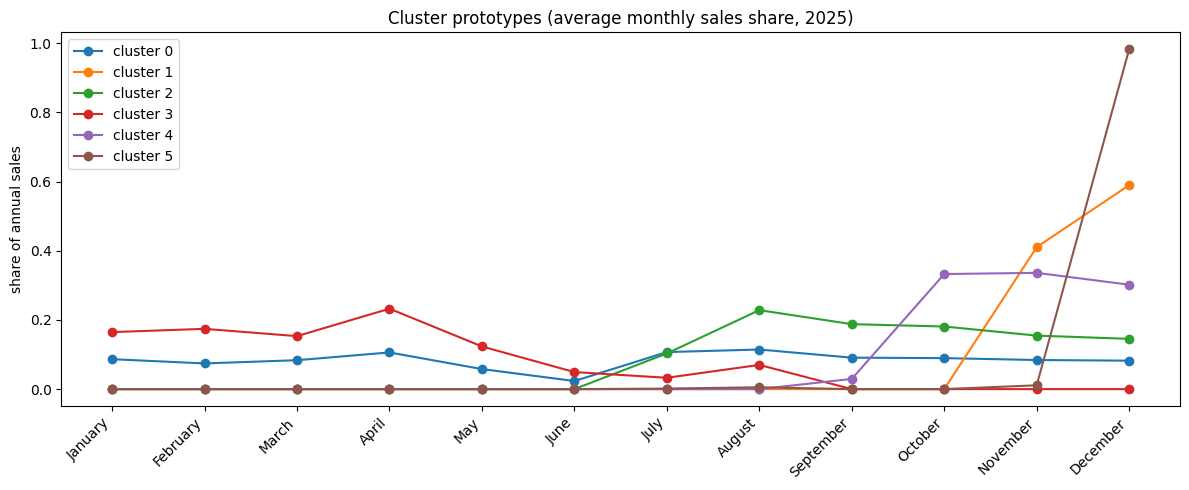

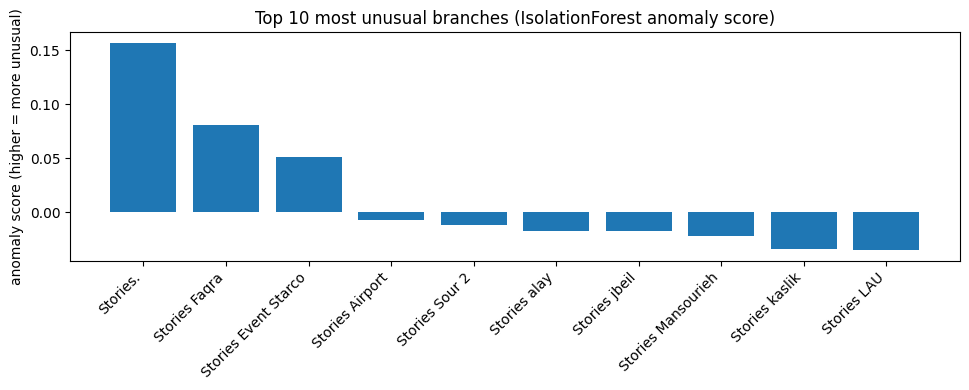

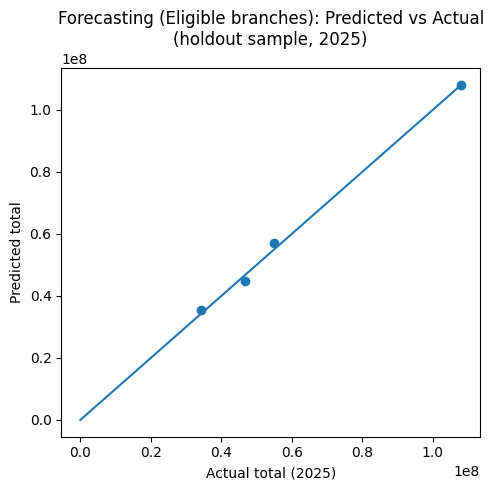

Top anomalies (flagged):


month,branch,cluster,y_total,first6_ratio,anomaly_score
24,Stories.,3,13905863.34,0.978386,0.157120
8,Stories Faqra,3,10977393.51,0.816166,0.081206
7,Stories Event Starco,5,597312.32,0.000000,0.051494


Forecast-eligible count: 15


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

MONTHS = ["January","February","March","April","May","June","July","August","September","October","November","December"]
FIRST6 = ["January","February","March","April","May","June"]

# --- Final master table (2025) ---
final_2025 = df2025.copy()
final_2025["first6_ratio"] = final_2025["x_first6_sum"] / final_2025["y_total"]
final_2025["forecast_eligible"] = final_2025["first6_ratio"] >= 0.10

final_cols = ["branch","y_total","x_first6_sum","first6_ratio","cluster","anomaly_score","is_anomaly","forecast_eligible"]
final_table = final_2025[final_cols].sort_values(["is_anomaly","anomaly_score"], ascending=[False, False])
display(final_table)

# --- Plot 1: Cluster prototypes (average monthly share curves) ---
proto = final_2025.groupby("cluster")[[f"share_{m}" for m in MONTHS]].mean()

plt.figure(figsize=(12,5))
for c in proto.index:
    plt.plot(MONTHS, proto.loc[c].values, marker="o", label=f"cluster {c}")
plt.xticks(rotation=45, ha="right")
plt.title("Cluster prototypes (average monthly sales share, 2025)")
plt.ylabel("share of annual sales")
plt.legend()
plt.tight_layout()
plt.show()

# --- Plot 2: Top anomaly scores ---
top_anom = final_2025.sort_values("anomaly_score", ascending=False).head(10)

plt.figure(figsize=(10,4))
plt.bar(top_anom["branch"], top_anom["anomaly_score"])
plt.xticks(rotation=45, ha="right")
plt.title("Top 10 most unusual branches (IsolationForest anomaly score)")
plt.ylabel("anomaly score (higher = more unusual)")
plt.tight_layout()
plt.show()

# --- Plot 3: Forecast (eligible only) Pred vs Actual using one simple holdout split ---
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

feature_cols = ["x_first6_sum"] + [f"x_{m}" for m in FIRST6] + [f"xshare_{m}" for m in FIRST6]

df_forecast = final_2025[final_2025["forecast_eligible"]].copy()

X = df_forecast[feature_cols].values
y = df_forecast["y_total"].values

Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.25, random_state=42)

model = Pipeline([("scaler", StandardScaler()), ("ridge", Ridge(alpha=1.0, random_state=42))])
model.fit(Xtr, ytr)
pred = model.predict(Xte)

plt.figure(figsize=(5,5))
plt.scatter(yte, pred)
mx = max(yte.max(), pred.max())
plt.plot([0, mx], [0, mx])
plt.title("Forecasting (Eligible branches): Predicted vs Actual\n(holdout sample, 2025)")
plt.xlabel("Actual total (2025)")
plt.ylabel("Predicted total")
plt.tight_layout()
plt.show()

print("Top anomalies (flagged):")
display(final_2025[final_2025["is_anomaly"]][["branch","cluster","y_total","first6_ratio","anomaly_score"]].sort_values("anomaly_score", ascending=False))

print("Forecast-eligible count:", int(final_2025["forecast_eligible"].sum()))

In [16]:
import pandas as pd
import numpy as np
import re

df673_raw = df673.copy()

# Rename columns to stable names
df673_raw.columns = [f"c{i}" for i in range(df673_raw.shape[1])]

# Find the header row (it usually contains "Category", "Qty", "Total Cost", "Total Profit", etc.)
hdr_idx = df673_raw.index[df673_raw["c0"].astype(str).str.strip().eq("Category")]
hdr_idx = int(hdr_idx[0]) if len(hdr_idx) else None
print("Header row index:", hdr_idx)

hdr = df673_raw.loc[hdr_idx].astype(str).str.strip().tolist()
df673_tbl = df673_raw.loc[hdr_idx+1:].copy()
df673_tbl.columns = hdr
df673_tbl = df673_tbl.replace({"": np.nan, "nan": np.nan})

# Helper to parse numbers like "1,234.56"
def num(x):
    if pd.isna(x): return np.nan
    x = str(x).strip().replace(",", "")
    try: return float(x)
    except: return np.nan

# Identify branch marker rows (rows where first column looks like a branch name "Stories ...")
first_col = df673_tbl.columns[0]
df673_tbl[first_col] = df673_tbl[first_col].astype(str).str.strip()

branch = None
rows = []
for _, r in df673_tbl.iterrows():
    v = str(r[first_col]).strip()

    if v.lower().startswith("stories") and v.lower() not in ["stories", "stories coffee"]:
        branch = v
        continue

    if v.upper() in ["BEVERAGES", "FOOD"] and branch is not None:
        qty   = num(r.get("Qty"))
        tcost = num(r.get("Total Cost"))
        tprof = num(r.get("Total Profit"))

        # Revenue correction rule: revenue = Total Cost + Total Profit
        revenue = (tcost if tcost is not None else 0) + (tprof if tprof is not None else 0)

        rows.append({
            "branch": branch,
            "category": v.upper(),
            "qty": qty,
            "total_cost": tcost,
            "total_profit": tprof,
            "revenue": revenue
        })

cat = pd.DataFrame(rows)

# Compute margins and category mix per branch
cat["profit_margin"] = cat["total_profit"] / cat["revenue"]

pivot = cat.pivot_table(index="branch", columns="category", values=["revenue","total_profit"], aggfunc="sum")
pivot.columns = [f"{a}_{b}".lower() for a,b in pivot.columns]
pivot = pivot.reset_index()

pivot["revenue_total"] = pivot.filter(like="revenue_").sum(axis=1)
pivot["profit_total"]  = pivot.filter(like="total_profit_").sum(axis=1)
pivot["overall_margin"] = pivot["profit_total"] / pivot["revenue_total"]

pivot["bev_revenue_share"] = pivot.get("revenue_beverages", 0) / pivot["revenue_total"]
pivot["food_revenue_share"] = pivot.get("revenue_food", 0) / pivot["revenue_total"]

# Merge with your ML outputs (clusters/anomalies)
profit_branch = final_2025.merge(pivot, on="branch", how="left")

display(profit_branch[[
    "branch","cluster","is_anomaly","forecast_eligible",
    "revenue_total","profit_total","overall_margin",
    "bev_revenue_share","food_revenue_share"
]].sort_values("overall_margin", ascending=False).head(15))

print("\nCorrelation: bev_revenue_share vs overall_margin")
print(profit_branch[["bev_revenue_share","overall_margin"]].corr().iloc[0,1])

Header row index: 2


,branch,cluster,is_anomaly,forecast_eligible,revenue_total,profit_total,overall_margin,bev_revenue_share,food_revenue_share
7,Stories Event Starco,5,True,False,5.971321e+05,453633.35,0.759687,0.781634,0.218366
15,Stories Sour 2,2,False,False,1.885649e+07,13812530.46,0.732508,0.570214,0.429786
8,Stories Faqra,3,True,True,1.091840e+07,7983379.75,0.731186,0.615368,0.384632
20,Stories jbeil,4,False,False,2.711850e+07,19735837.02,0.727763,0.523597,0.476403
13,Stories Ramlet El Bayda,0,False,True,4.988967e+07,36073449.84,0.723065,0.598007,0.401993
16,Stories Verdun,0,False,True,2.216208e+07,16022429.87,0.722966,0.587066,0.412934
2,Stories Airport,2,False,False,3.646650e+07,26205643.82,0.718622,0.643054,0.356946
0,Stories - Bir Hasan,0,False,True,3.106352e+07,22261437.45,0.716642,0.592781,0.407219
1,Stories Ain El Mreisseh,0,False,True,1.085982e+08,77771419.02,0.716139,0.608125,0.391875
6,Stories Centro Mall,0,False,True,3.362138e+07,24047788.91,0.715253,0.611215,0.388785



Correlation: bev_revenue_share vs overall_margin
0.7308131664208175
